In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FyntraCustomerData.csv');

In [3]:
import seaborn as sns

In [4]:
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
x = df['Time_on_Website'];
y = df['Time_on_App'];

C:\Users\Kapil\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


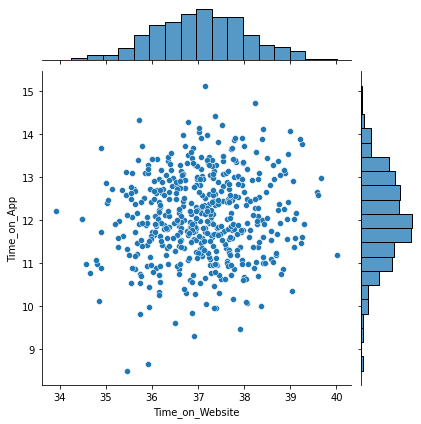

In [8]:
sns.jointplot(x,y, kind = "scatter", data = df)

C:\Users\Kapil\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


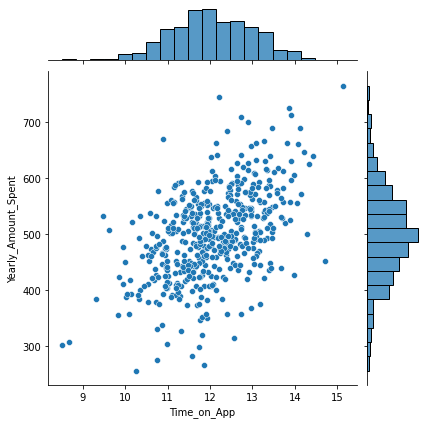

In [9]:
sns.jointplot(y,df['Yearly_Amount_Spent'], kind = "scatter", data = df)

In [15]:
column_1 = x
column_2 = y
column_3 = df['Yearly_Amount_Spent']
correlation = column_1. corr(column_2) 
print(correlation)

0.08238827323027008


In [14]:
correlation = column_2. corr(column_3) 
print(correlation)
print("less than one")

0.499327770059835
less than one


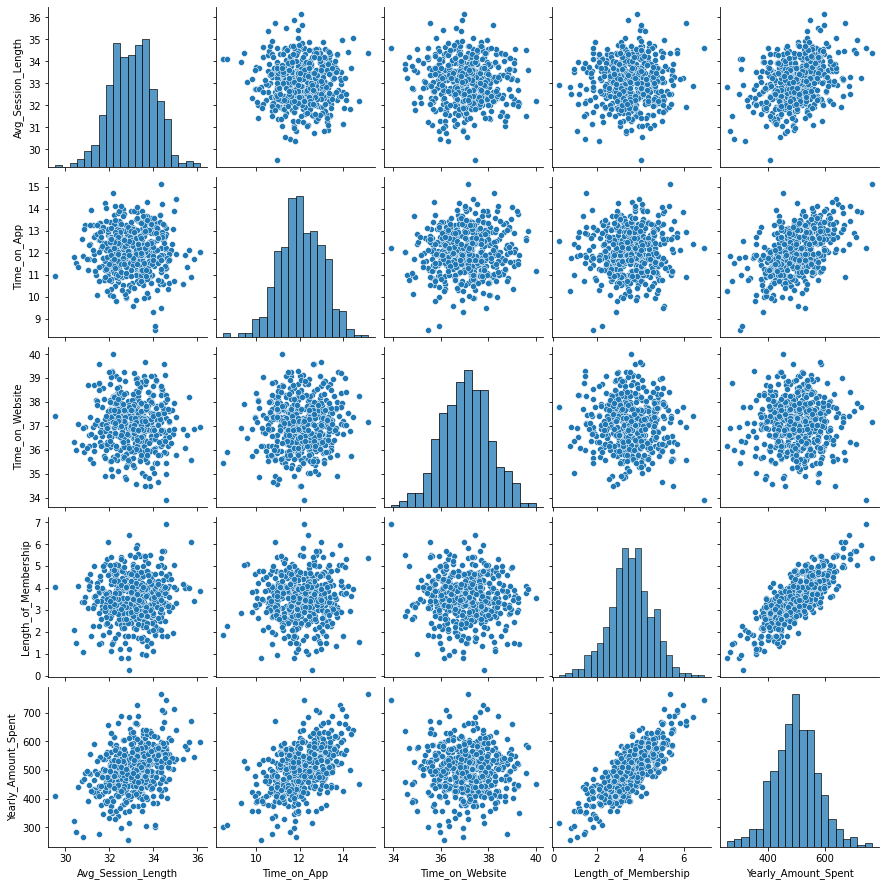

In [18]:
sns.pairplot(df)
plt.show()

In [27]:
print("Based off this plot what looks to be the most correlated feature with Yearly Amount Spent answer is" )
print("ANS: Length_of_Membership")
X = df['Length_of_Membership']
y = df['Yearly_Amount_Spent']

Based off this plot what looks to be the most correlated feature with Yearly Amount Spent answer is
ANS: Length_of_Membership


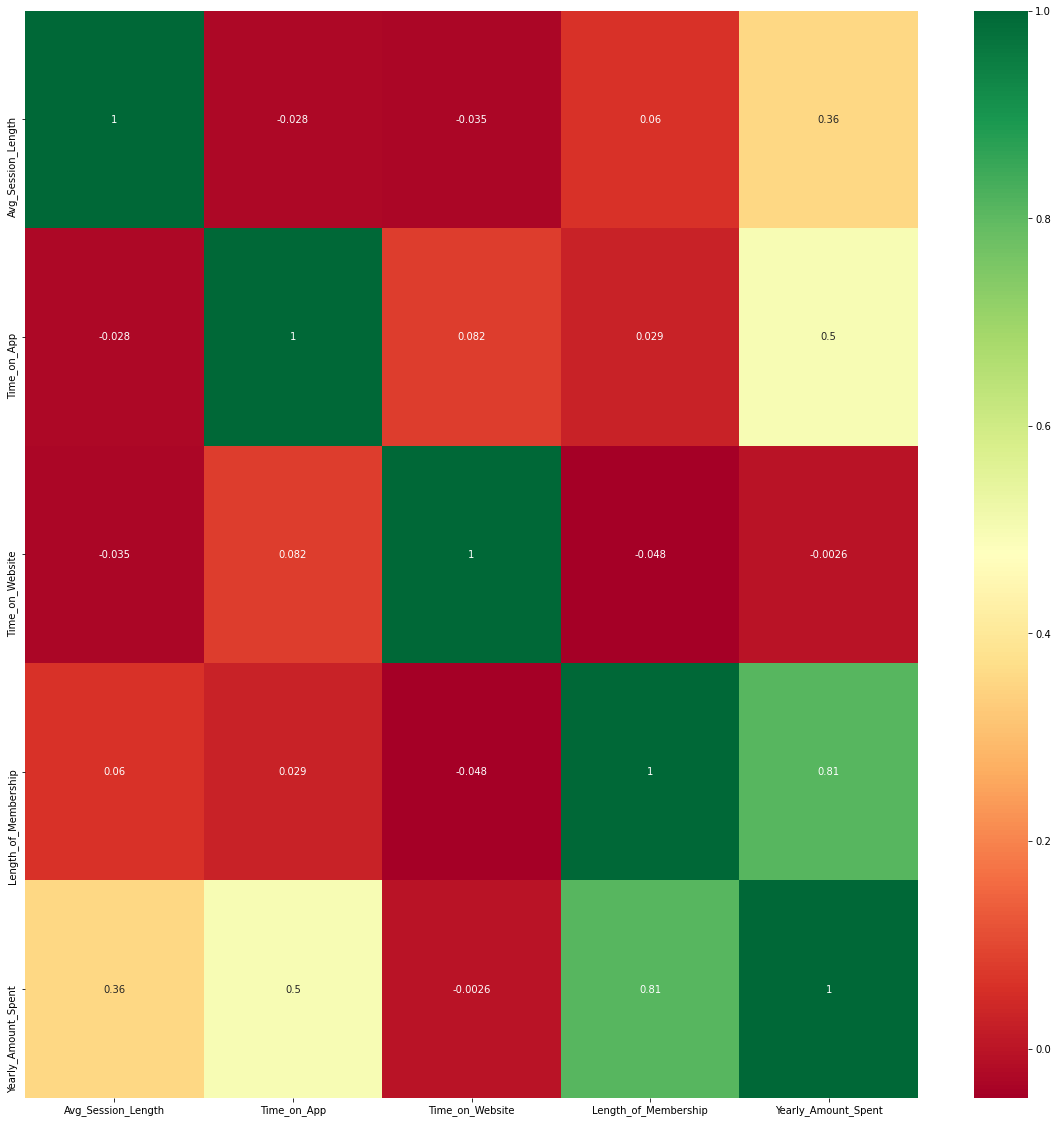

In [28]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=85)

In [31]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

C:\Users\Kapil\AppData\Local\Temp/ipykernel_4716/2733214152.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]
C:\Users\Kapil\AppData\Local\Temp/ipykernel_4716/2733214152.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:,np.newaxis]


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test)

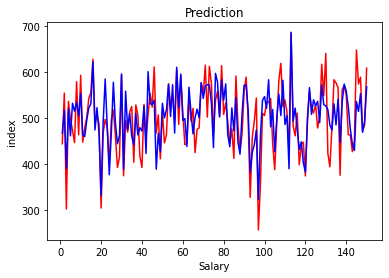

In [35]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

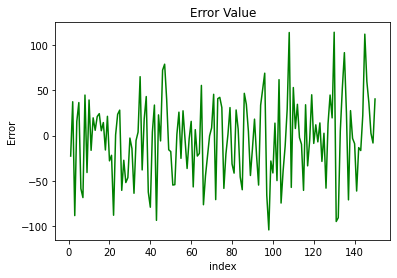

In [36]:
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [37]:
from sklearn.metrics import r2_score,mean_squared_error

In [40]:
mse = mean_squared_error(y_test,y_pred)
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)


mean squared error : 2005.0084500660193
r square : 0.6150624040337234


In [39]:
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 271.26135617004434
Coefficient of the line: [64.84222086]
